In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('extractedData/clean_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 9 columns):
Unnamed: 0        2046 non-null int64
Order Channel     2046 non-null object
Quantity          2046 non-null float64
Unit Price        2046 non-null float64
Customer Type     2046 non-null object
Category Group    2046 non-null object
shippingStatus    2046 non-null object
Category          2046 non-null object
Delivery Date     2046 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 144.0+ KB


In [5]:
df['Total_txn'] = df['Quantity'] * df['Unit Price']
#df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 10 columns):
Unnamed: 0        2046 non-null int64
Order Channel     2046 non-null object
Quantity          2046 non-null float64
Unit Price        2046 non-null float64
Customer Type     2046 non-null object
Category Group    2046 non-null object
shippingStatus    2046 non-null object
Category          2046 non-null object
Delivery Date     2046 non-null object
Total_txn         2046 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 160.0+ KB


In [6]:
#measures 
#ENtity order distribution,Unit price distribution, Order Frequency, delivery time analysis
#category wise order,order channek distribution, time series analysis for orders quantity, 
#correlation analysis, delivery time vs orderby channel, weekly trends

df.head()

,Unnamed: 0,Order Channel,Quantity,Unit Price,Customer Type,Category Group,shippingStatus,Category,Delivery Date,Total_txn
0,0,Mobile App,2.0,7000.0,General Trade,Baby,delivered,Infant Care,2020-12-02 12:01:00,14000.0
1,1,Mobile App,1.0,7000.0,General Trade,Baby,delivered,Infant Care,2020-12-02 12:01:00,7000.0
2,2,Mobile App,1.0,7000.0,General Trade,Baby,delivered,Infant Care,2020-12-02 12:01:00,7000.0
3,3,Whatsapp,1.0,7000.0,General Trade,Baby,delivered,Infant Care,2020-12-02 12:08:00,7000.0
4,4,Whatsapp,1.0,7000.0,General Trade,Baby,delivered,Infant Care,2020-12-02 12:08:00,7000.0


In [12]:
df['Category Group'].nunique()

5

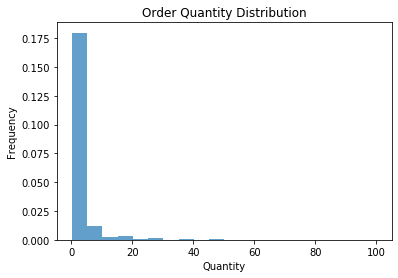

In [20]:
#Order Quantity - using the quantity metrics

plt.hist(df['Quantity'], bins =20, density=True, alpha=0.7)
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

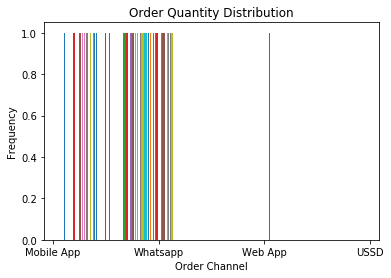

In [6]:
#Order Quantity - using the quantity metrics

plt.hist(df['Order Channel'], bins =5)
plt.title('Order Quantity Distribution')
plt.xlabel('Order Channel')
plt.ylabel('Frequency')
plt.show()

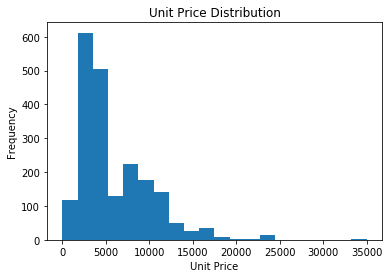

In [11]:
#Unit Price Distribution

plt.hist(df['Unit Price'], bins =20)
plt.title('Unit Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

In [17]:
#Order Frequency over time


Delivery_per_day = df.resample('W').size()

sns.lineplot(x=Delivery_per_day.index, y=Delivery_per_day.values)
plt.title('Order Frequency over time')
plt.xlabel('Date')
plt.ylabel('Number of Deliveries made')
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 9 columns):
Unnamed: 0        2046 non-null int64
Order Channel     2046 non-null object
Quantity          2046 non-null float64
Unit Price        2046 non-null float64
Customer Type     2046 non-null object
Category Group    2046 non-null object
shippingStatus    2046 non-null object
Category          2046 non-null object
Delivery Date     2046 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 144.0+ KB


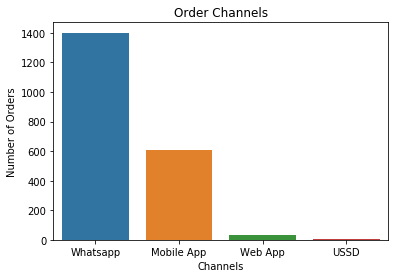

In [4]:
#orderchannel - seaborn

order_channel_counts = df['Order Channel'].value_counts()

sns.barplot(x=order_channel_counts.index, y=order_channel_counts.values)
plt.title('Order Channels')
plt.xlabel('Channels')
plt.ylabel('Number of Orders')
plt.show()

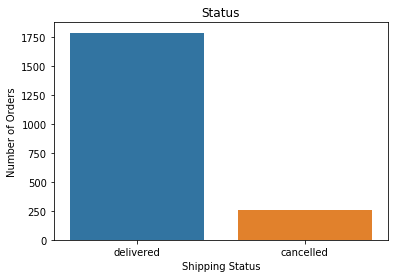

In [13]:
#orderchannel Delivered - seaborn

status_channel_counts = df['shippingStatus'].value_counts()

sns.barplot(x=status_channel_counts.index, y=status_channel_counts.values)
plt.title('Status')
plt.xlabel('Shipping Status')
plt.ylabel('Number of Orders')
plt.show()

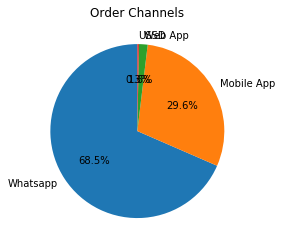

In [8]:
#orderchannel - matplot

order_channel_counts = df['Order Channel'].value_counts()

plt.pie(order_channel_counts, labels=order_channel_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Order Channels')
plt.show()

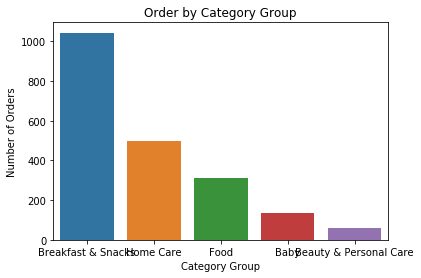

In [14]:
order_category_group_counts = df['Category Group'].value_counts()

sns.barplot(x=order_category_group_counts.index, y=order_category_group_counts.values)
plt.title('Order by Category Group')
plt.xlabel('Category Group')
plt.ylabel('Number of Orders')
plt.show()

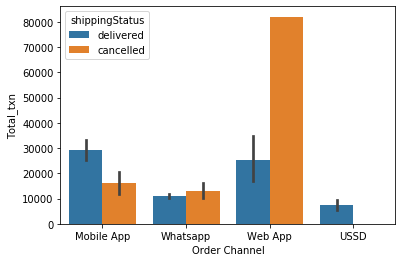

In [15]:
# class v / s fare barplot 

sns.barplot(y = 'Total_txn', x = 'Order Channel', hue = 'shippingStatus', data = df)
 
# Show the plot
plt.show()

In [19]:
df.groupby("Order Channel").shippingStatus.max()

NameError: name 'Total_txn' is not defined